## 간단한 Linear Regression 만들기

#### 1. 모형 만들기
주어진 데이터를 통해 선형모형(가설) 만들기
$$ H(x) = Wx + b $$

#### 2. Cost Function 
비용함수 만들기 : 예측값과 실제 값을 토대로 비용함수 만들기
#### 3. Minimize 
training. 비용함수를 가장 최소화하는 과정
#### 4. W, b 구하기
위의 과정을 통해 비용함수를 최소화하는 W, b를 구하는 것이 최종 학습목표이다.

In [1]:
import tensorflow as tf

1. 먼저 그래프를 빌드한다(노드 정의)


In [2]:
# 학습데이터
X_train = [1, 2, 3]
y_train = [1, 2, 3]

# w, b 변수 정의: 텐서플로우에서 Variable은 텐서플로어에서 자체적으로 값을 변경시키는 변수로 일반 변수개념과는 다름
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = X_train * W + b

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# cost function 정의
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

2. 비용함수 최소화하는 연산과 이를 반영한 트레이닝 연산 그래프 빌드

In [4]:
# GradientDescent을 이용한 최소화
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

3. 실행 및 모수 업데이트

In [5]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 3.86431 [0.40727964] [-0.71984106]
20 0.054122552 [1.0887114] [-0.39850217]
40 0.017824976 [1.1467754] [-0.35239768]
60 0.015904875 [1.1458032] [-0.3332296]
80 0.0144424895 [1.1395152] [-0.31732088]
100 0.013116881 [1.1330123] [-0.30238438]
120 0.011912958 [1.1267664] [-0.2881712]
140 0.010819539 [1.1208091] [-0.27462798]
160 0.009826477 [1.1151317] [-0.26172143]
180 0.00892456 [1.109721] [-0.24942149]
200 0.008105434 [1.1045644] [-0.23769955]
220 0.0073614693 [1.0996503] [-0.22652854]
240 0.006685817 [1.0949671] [-0.21588252]
260 0.0060721603 [1.0905039] [-0.20573683]
280 0.005514832 [1.0862505] [-0.19606787]
300 0.0050086533 [1.0821971] [-0.18685338]
320 0.0045489324 [1.0783341] [-0.17807187]
340 0.0041314214 [1.0746527] [-0.1697031]
360 0.0037522211 [1.0711442] [-0.16172768]
380 0.0034078232 [1.0678008] [-0.15412708]
400 0.0030950445 [1.0646144] [-0.14688367]
420 0.0028109578 [1.0615777] [-0.1399807]
440 0.0025529573 [1.0586838] [-0.13340205]
460 0.0023186414 [1.0559258] [-0.12713

## Placeholder 사용

In [6]:
import tensorflow as tf
# 1. 변수 및 플레이스 홀더 정의
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 2. 가설(모형) 정의
hypothesis = X * W + b

# 3. 코스트 함수 정의
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 4. 코스트 최소화를 위한 트레이닝 : Gradient descent algorithm 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 5. 세션 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6. 위의 그래프 실행
X_train = [1, 2, 3, 4, 5]
y_train = [2.1, 3.1, 4.1, 5.1, 6.1]

costs = []
Ws = []
bs = []
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: X_train, Y: y_train})
    costs.append(cost_val)
    Ws.append(W_val)
    bs.append(b_val)
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

Instructions for updating:
Use tf.cast instead.
0 22.09879 [0.7388375] [-1.7557975]
20 1.0699391 [1.6647314] [-1.3170487]
40 0.93401355 [1.6253023] [-1.1576173]
60 0.8156813 [1.5843693] [-1.0097591]
80 0.7123405 [1.5460986] [-0.8715892]
100 0.6220921 [1.5103341] [-0.7424682]
120 0.54327786 [1.4769119] [-0.6218036]
140 0.47444838 [1.4456786] [-0.50904125]
160 0.41433963 [1.4164908] [-0.40366393]
180 0.36184573 [1.3892144] [-0.3051877]
200 0.31600258 [1.3637245] [-0.21316095]
220 0.27596742 [1.3399038] [-0.12716098]
240 0.24100438 [1.3176433] [-0.04679319]
260 0.21047087 [1.2968405] [0.02831123]
280 0.1838058 [1.2774003] [0.09849698]
300 0.16051905 [1.2592331] [0.16408613]
320 0.14018235 [1.2422557] [0.2253799]
340 0.122422315 [1.2263901] [0.28265947]
360 0.10691239 [1.2115637] [0.3361877]
380 0.0933674 [1.1977082] [0.3862104]
400 0.081538394 [1.1847601] [0.43295705]
420 0.07120807 [1.1726601] [0.47664228]
440 0.0621865 [1.1613524] [0.5174664]
460 0.054307975 [1.1507853] [0.555617]
480 0

    step 2000에 도달하면 코스트는 거의 제로에 수렴되고, weight는 1, bias는 1.1에 가까워진다.
    
    즉,
$$H(x) = 1 * X + 1.1$$

In [7]:
## Test the model

print(sess.run(hypothesis, feed_dict={X: [5]}))

[6.1011386]


In [8]:
print(sess.run(hypothesis, feed_dict={X: [2.5]}))

[3.5990906]


In [9]:
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[2.5982714 4.59991  ]


In [10]:
# w vs cost plotting
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

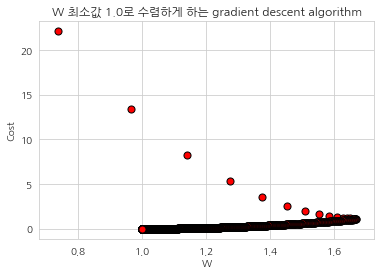

In [11]:
plt.scatter(Ws, costs, c='red', s=50, marker='o', edgecolor='k')
plt.xlabel("W")
plt.ylabel("Cost")
plt.title("W 최소값 1.0로 수렴하게 하는 gradient descent algorithm")
plt.show()

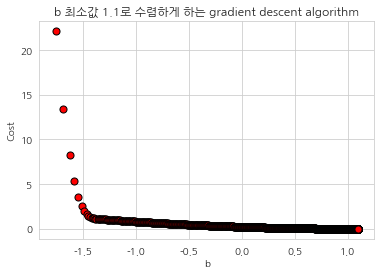

In [13]:
plt.scatter(bs, costs, c='red', s=50, marker='o', edgecolor='k')
plt.xlabel("b")
plt.ylabel("Cost")
plt.title("b 최소값 1.1로 수렴하게 하는 gradient descent algorithm")
plt.show()